# Ejercicio Reconocimiento imágenes

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Noviembre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook ofrece un ejemplo de reconocimiento de imágenes

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import sklearn
print(sklearn.__version__)
````


In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [ ]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_chi.zip

--2024-12-16 12:00:44--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_chi.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439565 (429K) [application/zip]
Saving to: ‘dataset_chi.zip’

dataset_chi.zip     100%[===================>] 429.26K  --.-KB/s    in 0.06s   

2024-12-16 12:00:45 (6.52 MB/s) - ‘dataset_chi.zip’ saved [439565/439565]



In [ ]:
# Descomprimir el archivo directamente dentro de la carpeta data
!unzip -q dataset_chi.zip

# Eliminar el archivo zip
!rm dataset_chi.zip

!rm -rf __MACOSX

## PARTE 1 - Preprocesamiento de datos

### Datos de entrenamiento

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset_chi/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 26 images belonging to 2 classes.


### Datos de prueba

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset_chi/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 14 images belonging to 2 classes.


In [ ]:
# Seta las semillas para números random

np.random.seed(29)
tf.random.set_seed(29)

## PARTE 2 - Construyendo la red neuronal convolucional
### Inicializando la red

Para leer de keras: https://keras.io/getting_started/

In [ ]:
cnn = tf.keras.models.Sequential(name="Mi_CNN_chihuahuas")

### PASO 1 - Convolución

In [ ]:
cnn.add(tf.keras.layers.Input(shape=(64, 64, 3), name="capa_entrada"))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name="Convolucion_1"))

### PASO 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="Pooling_1"))

### Agregando segunda capa

Segunda convolución y segundo Pooling

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name="Convolucion_2"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="Pooling_2"))

### PASO 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten(name="flatten"))

### PASO 4 - Full connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu', name="full_connection"))

### PASO 5 - Output layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid', name="capa_salida"))

In [ ]:
cnn.summary()

Model: "Mi_CNN_chihuahuas"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Convolucion_1 (Conv2D)               │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pooling_1 (MaxPooling2D)             │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucion_2 (Conv2D)               │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pooling_2 (MaxPooling2D)             │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ full_connection (Dense)              │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_salida (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

# PARTE 3 - Entrenando la red
## Compilando la red

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Entrenando la red con el set de entrenamiento y evaluando con el set de prueba

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7116 - val_accuracy: 0.5000 - val_loss: 0.8096
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5000 - loss: 0.8225 - val_accuracy: 0.5714 - val_loss: 0.6553
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.5000 - loss: 0.6666 - val_accuracy: 0.5000 - val_loss: 0.6678
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.5000 - loss: 0.6722 - val_accuracy: 0.5714 - val_loss: 0.6494
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5385 - loss: 0.6638 - val_accuracy: 0.9286 - val_loss: 0.6039
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.8846 - loss: 0.6257 - val_accuracy: 0.7143 - val_loss: 0.5879
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.5385 - loss: 0.6103 - val_accuracy: 0.7143 - val_loss: 0.5633
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.5769 - loss: 0.5954 - val_accuracy: 0.8571 - val_loss: 0.5112
Epoch 

## Gráficos de los resultados

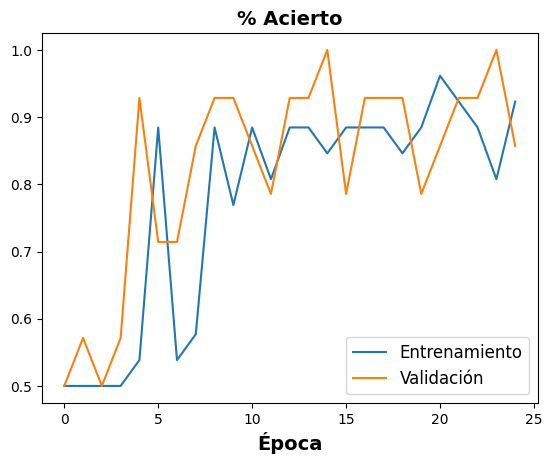

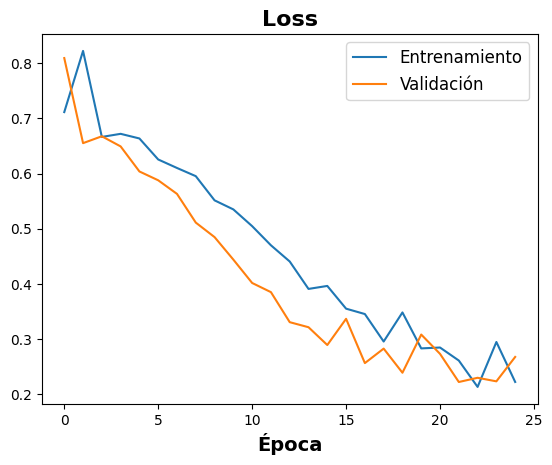

In [ ]:
# Gráfica para el % de acierto
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Loss', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# PARTE 4 - Realizando predicción

Utiliza las imágenes de la carpeta

```
dataset_chi/single_prediction/
```



In [ ]:
!pwd

/content


** Dimensiones de la imagen 1: 110x108
** Píxel en (10, 10) de la imagen 1: (181, 135, 85)
--------------------
** Dimensiones de la imagen 2: 171x170
** Píxel en (10, 10) de la imagen 2: (148, 161, 169)
--------------------
** Dimensiones de la imagen 3: 165x164
** Píxel en (10, 10) de la imagen 3: (249, 249, 251)
--------------------
** Dimensiones de la imagen 4: 125x124
** Píxel en (10, 10) de la imagen 4: (162, 101, 82)
--------------------


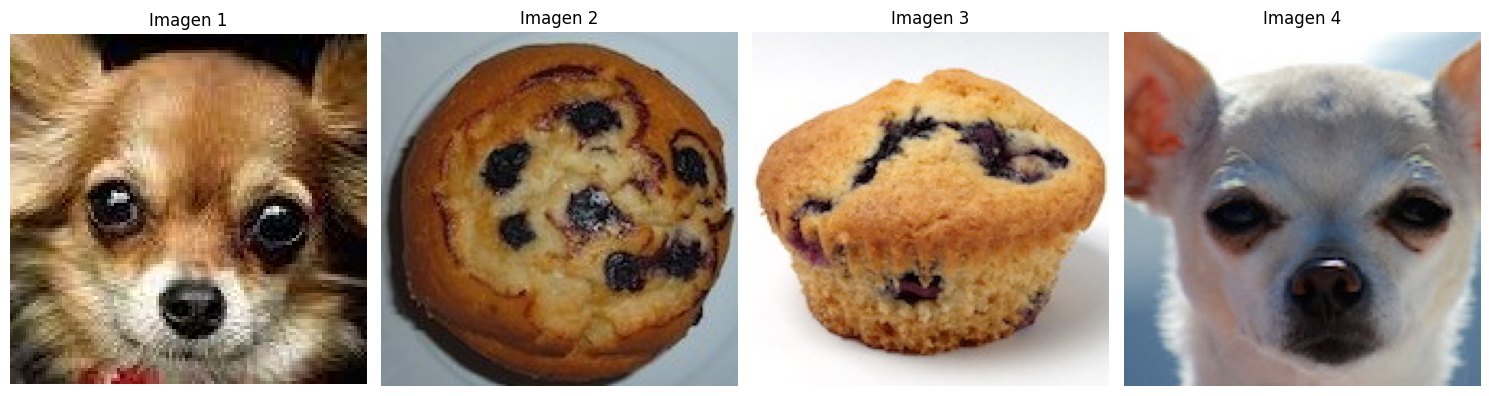

In [ ]:
# Número de imágenes
num_images = 4

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # 1 fila y `num_images` columnas

for i in range(1, num_images + 1):  # Iterar sobre las imágenes
    f_name = 'chi_o_muf_' + str(i) + '.jpg'
    image_path = f'/content/dataset_chi/single_prediction/{f_name}'

    # Mostrar la imagen en el subgráfico correspondiente
    img = plt.imread(image_path)
    axes[i - 1].imshow(img)  # Mostrar la imagen en el subgráfico `i-1`
    axes[i - 1].set_title(f"Imagen {i}", fontsize=12)  # Título del subgráfico
    axes[i - 1].axis("off")  # Ocultar los ejes

    # Redimensionar y preprocesar la imagen
    img = tf.image.resize(img, (150, 150))
    img = tf.cast(img, tf.float32)
    img = tf.expand_dims(img, 0)

    # Obtener dimensiones y un píxel específico
    imagen = Image.open(image_path)
    ancho, alto = imagen.size
    print(f"** Dimensiones de la imagen {i}: {ancho}x{alto}")

    # Acceder al píxel en la posición (x, y)
    x, y = 10, 10  # Coordenadas del píxel
    pixeles = imagen.load()
    print(f"** Píxel en ({x}, {y}) de la imagen {i}: {pixeles[x, y]}")
    print("-"*20)
# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()

In [ ]:
def get_prediction(cnn, name :str = 'chi_o_muf_1.jpg', figsize=(4, 4)):
  path_img = 'dataset_chi/single_prediction/' + name
  test_image = image.load_img('dataset_chi/single_prediction/' + name, target_size = (64, 64))
  # Mostrar la imagen
  fig, ax = plt.subplots(1, 1, figsize=figsize)

  ax.imshow(plt.imread(path_img))
  plt.title(f"Imagen para predicción: {name}")
  plt.show()
  # Prepara la imagen para ser entregada al modelo
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  print(result)
  training_set.class_indices
  return 'muffin' if result[0][0] == 1 else 'chihuahua'

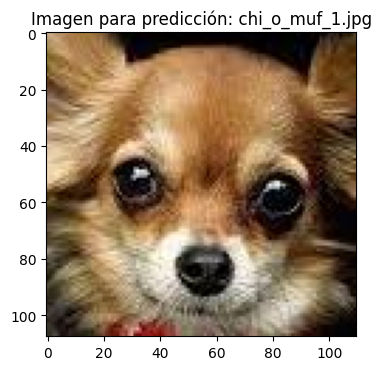

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[0.2240231]]
chihuahua


In [ ]:
print(get_prediction(cnn))

La matriz que retorna el método predict es de 1 x 1 y puede contener un 0 o 1.

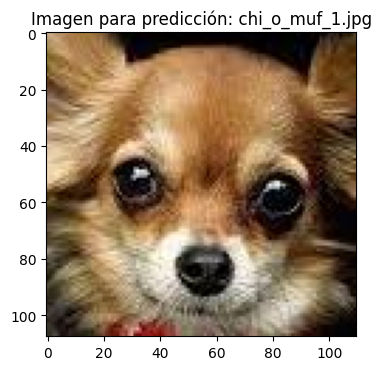

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.2240231]]
chi_o_muf_1.jpg es un chihuahua


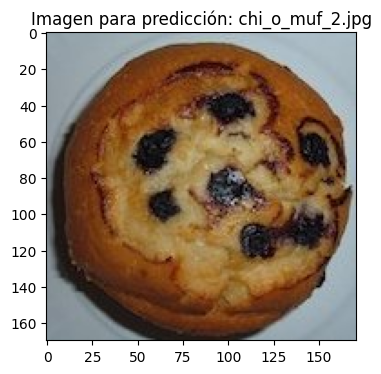

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.]]
chi_o_muf_2.jpg es un muffin


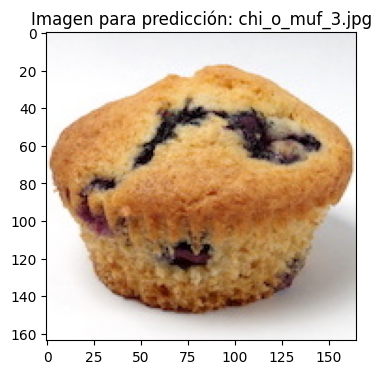

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.]]
chi_o_muf_3.jpg es un muffin


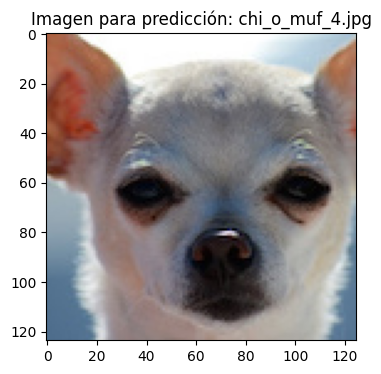

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.]]
chi_o_muf_4.jpg es un chihuahua


In [ ]:
for i in range(1,5):
    f_name = 'chi_o_muf_' + str(i) + '.jpg'
    print(f_name, 'es un', get_prediction(cnn, f_name))

# PARTE 5 - Cambiando la última capa

En esta parte se cambia la capa de salida: cambiando la función de activación y la cantidad de neuronas.

In [ ]:
# Ajustar el conjunto de datos
test_set_x = test_datagen.flow_from_directory('dataset_chi/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')

training_set_x = train_datagen.flow_from_directory('dataset_chi/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

# Ajustar la arquitectura de la red
cnn_x = tf.keras.models.Sequential(name="Mi_CNN")

cnn_x.add(tf.keras.layers.Input(shape=(64, 64, 3), name="capa_entrada"))
cnn_x.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name="Convolucion_1"))
cnn_x.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="Pooling_1"))

cnn_x.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', name="Convolucion_2"))
cnn_x.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, name="Pooling_2"))

cnn_x.add(tf.keras.layers.Flatten(name="flatten"))
cnn_x.add(tf.keras.layers.Dense(units=128, activation='relu', name="full_connection"))

# Cambiar la capa de salida
cnn_x.add(tf.keras.layers.Dense(units=2, activation='softmax', name="capa_salida"))

# Compilar el modelo
cnn_x.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_x = cnn_x.fit(x=training_set_x, validation_data=test_set_x, epochs=25)


Found 14 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5000 - loss: 0.7127

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7127 - val_accuracy: 0.5000 - val_loss: 0.9949
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5000 - loss: 0.9788 - val_accuracy: 0.5000 - val_loss: 0.6748
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.5000 - loss: 0.6411 - val_accuracy: 0.5000 - val_loss: 0.7158
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.5000 - loss: 0.6679 - val_accuracy: 0.5000 - val_loss: 0.6327
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5385 - loss: 0.6116 - val_accuracy: 0.8571 - val_loss: 0.5942
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.9231 - loss: 0.5703 - val_accuracy: 0.7857 - val_loss: 0.5686
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.8077 - loss: 0.5672 - val_accuracy: 0.9286 - val_loss: 0.5277
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.8462 - loss: 0.5314 - val_accuracy: 0.8571 - val_loss: 0.4955
Epoch 

In [ ]:
cnn_x.summary()

Model: "Mi_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Convolucion_1 (Conv2D)               │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pooling_1 (MaxPooling2D)             │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Convolucion_2 (Conv2D)               │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pooling_2 (MaxPooling2D)             │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ full_connection (Dense)              │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ capa_salida (Dense)                  │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,440,040 (9.31 MB)

 Trainable params: 813,346 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626,694 (6.21 MB)

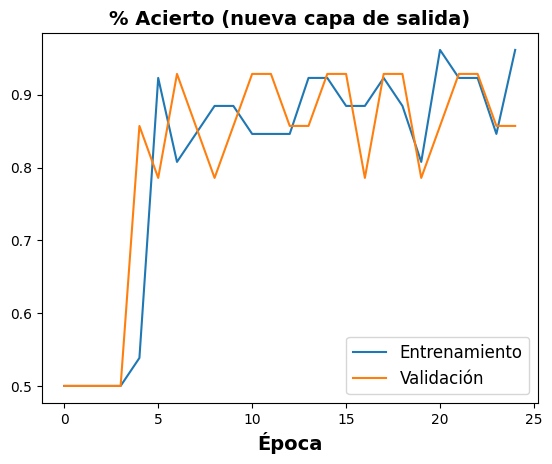

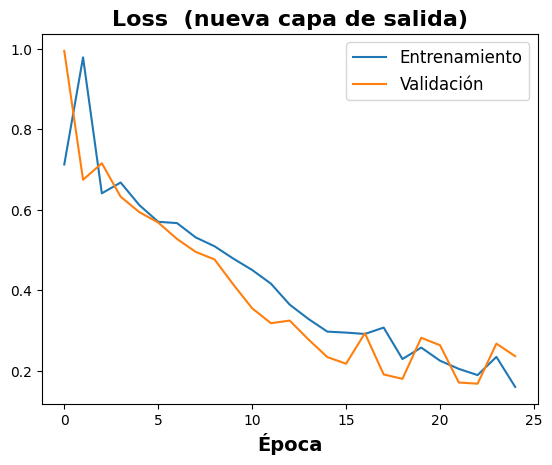

In [ ]:
# Gráfica para el % de acierto
plt.plot(history_x.history['accuracy'], label='Entrenamiento')
plt.plot(history_x.history['val_accuracy'], label='Validación')
plt.title('% Acierto (nueva capa de salida)', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

# Gráfica para la pérdida
plt.plot(history_x.history['loss'], label='Entrenamiento')
plt.plot(history_x.history['val_loss'], label='Validación')
plt.title('Loss  (nueva capa de salida)', fontsize=16, fontweight="bold")
plt.xlabel('Época', fontsize=14, fontweight="bold")
plt.legend(fontsize=12)  # Agrega la leyenda
plt.show()

## Probando las redes con imágenes desconocidas

In [ ]:
# Descargar archivos
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data_cnn/img_0_105.jpg
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data_cnn/img_0_152.jpg
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data_cnn/perezoso.jpeg

--2024-12-16 12:40:04--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data_cnn/img_0_105.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14059 (14K) [image/jpeg]
Saving to: ‘img_0_105.jpg’

img_0_105.jpg       100%[===================>]  13.73K  --.-KB/s    in 0.001s  

2024-12-16 12:40:04 (10.4 MB/s) - ‘img_0_105.jpg’ saved [14059/14059]

--2024-12-16 12:40:04--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data_cnn/img_0_152.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
def get_prediction_x(cnn, name : str, figsize=(4,4), view : bool = True):
  if view:
    # Mostrar la imagen
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    ax.imshow(plt.imread(name))
    plt.title(f"Imagen para predicción: {name}")
    plt.show()

  test_image = image.load_img(name, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  print(result)
  training_set.class_indices
  return 'muffin' if result[0][0] == 1 else 'chihuahua'

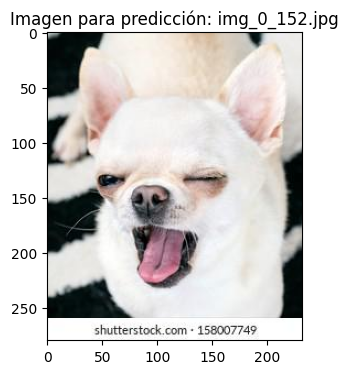

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1. 0.]]
img_0_152.jpg para la red Mi_CNN es un muffin
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.]]
img_0_152.jpg para la red Mi_CNN_chihuahuas es un chihuahua


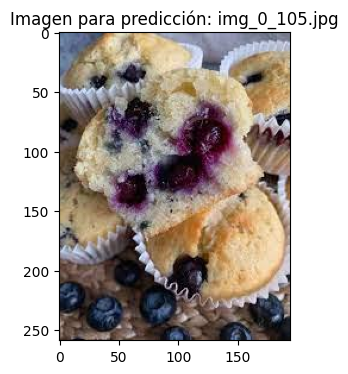

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0. 1.]]
img_0_105.jpg para la red Mi_CNN es un chihuahua
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.]]
img_0_105.jpg para la red Mi_CNN_chihuahuas es un muffin


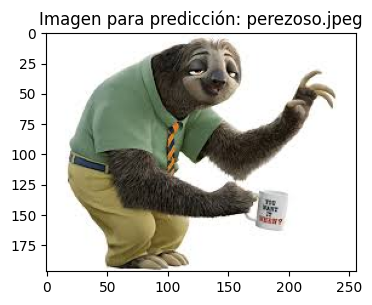

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0. 1.]]
perezoso.jpeg para la red Mi_CNN es un chihuahua
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.]]
perezoso.jpeg para la red Mi_CNN_chihuahuas es un chihuahua


In [ ]:
for f_name in ['img_0_152.jpg', 'img_0_105.jpg', 'perezoso.jpeg']:
  print(f_name, 'para la red', cnn_x.name,'es un', get_prediction_x(cnn_x, f_name))
  print(f_name, 'para la red', cnn.name,'es un', get_prediction_x(cnn, f_name, view=False))

# PASO 6 - Guardar la red

Siempre es una buena opción, guardar la red después de haber sido entrenada. Esto es muy útil cuando el tiempo de entrenamiento toma varias horas.

Está la opción de guardar sólo los pesos o el modelo completo.

Para guardar:


```
# Guardar los pesos
red.save_weights('pesos_modelo.weights.h5')

# Guardar el modelo completo
red.save('modelo.keras')
```



Para cargar:

```
# Restaurar los pesos
red.load_weights('pesos_modelo.weights.h5')

# Restaurar el modelo completo desde .h5
red_cargada = load_model('modelo.keras')
```



In [ ]:
# Guardar los pesos
cnn.save_weights('pesos_modelo_base.weights.h5')
# Guardar el modelo completo
cnn.save('modelo_base_completo.keras')

# Guardar los pesos
cnn_x.save_weights('pesos_modelo_variante.weights.h5')
# Guardar el modelo completo
cnn_x.save('modelo_variante_completo.keras')

Ahora carga los modelos y hace la misma predicción anterior

In [ ]:
red_a = load_model('modelo_base_completo.keras')
red_b = load_model('modelo_variante_completo.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


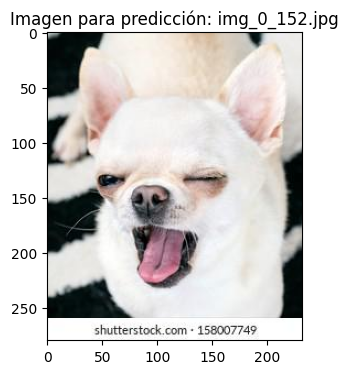

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[1. 0.]]
img_0_152.jpg para la red Mi_CNN es un muffin
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.]]
img_0_152.jpg para la red Mi_CNN_chihuahuas es un chihuahua


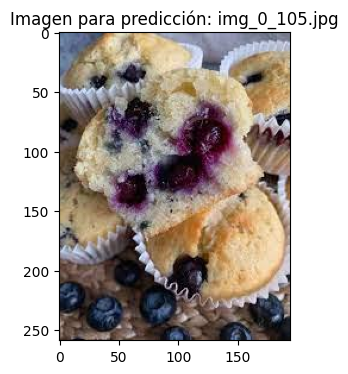

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0. 1.]]
img_0_105.jpg para la red Mi_CNN es un chihuahua
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1.]]
img_0_105.jpg para la red Mi_CNN_chihuahuas es un muffin


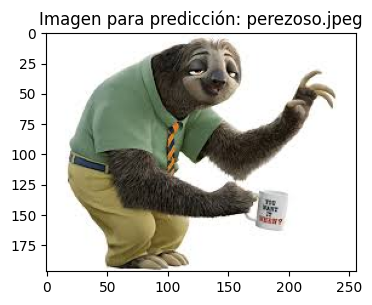

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0. 1.]]
perezoso.jpeg para la red Mi_CNN es un chihuahua
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.]]
perezoso.jpeg para la red Mi_CNN_chihuahuas es un chihuahua


In [ ]:
# Repite la predicción; ahora con las redes cargadas
for f_name in ['img_0_152.jpg', 'img_0_105.jpg', 'perezoso.jpeg']:
  print(f_name, 'para la red', cnn_x.name,'es un', get_prediction_x(red_b, f_name))
  print(f_name, 'para la red', cnn.name,'es un', get_prediction_x(red_a, f_name, view=False))